<a href="https://colab.research.google.com/github/bysischpok/Lab1/blob/main/%D0%9B%D0%B0%D0%B14_%D0%9A%D0%BB%D0%B0%D1%81%D1%82%D0%B5%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# импорт нужных библиотек
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
#Считываем датасет и выводим на экран
data = pd.read_csv("StudentPerformanceFactors.csv")
data.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


<class 'pandas.core.frame.DataFrame'>
Index: 6378 entries, 0 to 6606
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Hours_Studied               6378 non-null   int64
 1   Attendance                  6378 non-null   int64
 2   Parental_Involvement        6378 non-null   int64
 3   Access_to_Resources         6378 non-null   int64
 4   Extracurricular_Activities  6378 non-null   int64
 5   Sleep_Hours                 6378 non-null   int64
 6   Previous_Scores             6378 non-null   int64
 7   Motivation_Level            6378 non-null   int64
 8   Internet_Access             6378 non-null   int64
 9   Tutoring_Sessions           6378 non-null   int64
 10  Family_Income               6378 non-null   int64
 11  Teacher_Quality             6378 non-null   int64
 12  School_Type                 6378 non-null   int64
 13  Peer_Influence              6378 non-null   int64
 14  Physical_Acti

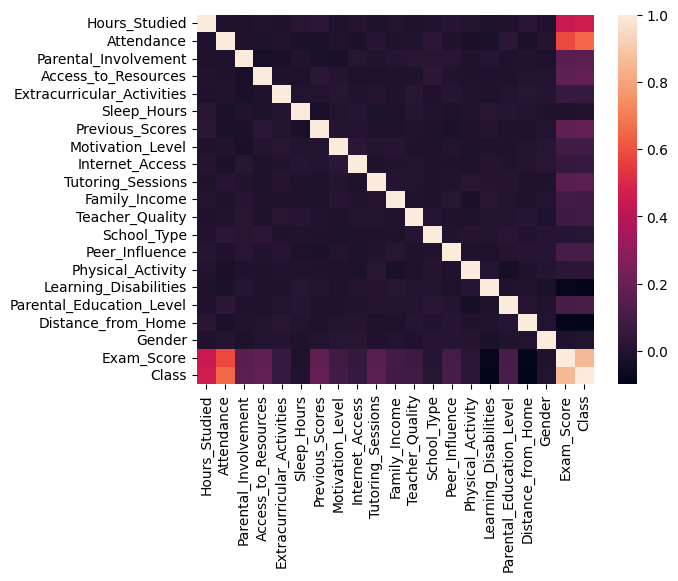

In [ ]:
#Предобработка датасета : удаление путых значений и замена категориальных переменных
data.info()
data = data.dropna()
replace_dict = {'Yes': 1, 'No': 0,
                'Low' : -1, 'Medium' : 0, 'High' : 1,
                'Public' : 1, 'Private' : 2,
                'Positive': 1,'Neutral' : 0, 'Negative':-1,
                'High School': 0, 'College':1, 'Postgraduate':2,
                'Near':0,'Moderate':1,'Far':2,
                'Male':1, 'Female':0}
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
for category in categorical_cols:
  data[category] = data[category].map(replace_dict)
#Добавляю столбец Class, в который заношу уровень ученика в зависимости от оценки на экзамене
data['Class'] = np.select(
 [(data['Exam_Score'] >=55)&(data['Exam_Score'] <65), (data['Exam_Score'] >=65) & (data['Exam_Score'] <=67), (data['Exam_Score'] >67)&(data['Exam_Score'] <70),(data['Exam_Score'] >=70)],
 [1,2,3,4]
)
class_counts = data['Class'].value_counts()
# Выводим результаты разбиения на классы
print("Количество единиц:", class_counts.get(1, 0))
print("Количество двоек:", class_counts.get(2, 0))
print("Количество троек:", class_counts.get(3, 0))
print("Количество четверок:", class_counts.get(4, 0))

#Дополнительно выведем матрицу корреляции
sns.heatmap(data.corr())
plt.show()


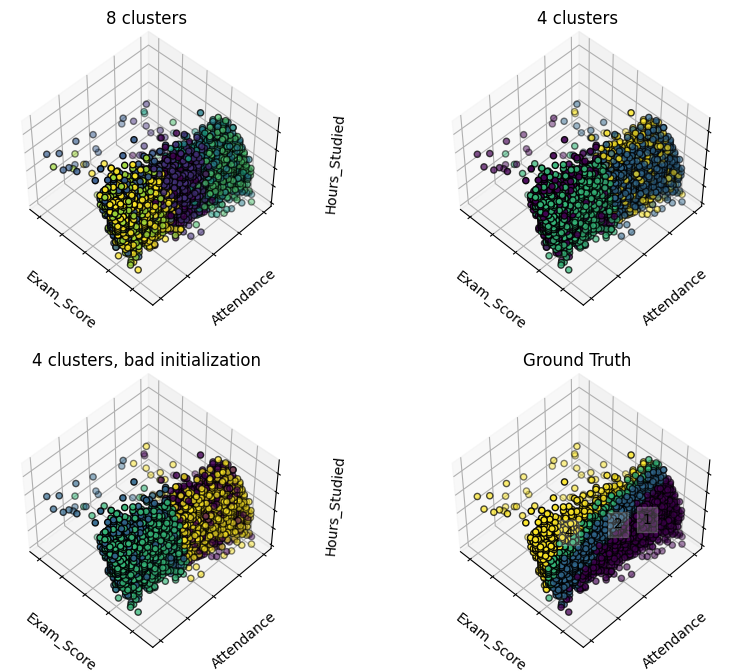

In [ ]:
import mpl_toolkits.mplot3d  # noqa: F401
from sklearn.cluster import KMeans

X = data
y = data["Class"]
yvals = data["Class"]

vals = data["Class"].unique()

estimators = [
    ("k_means_class_8", KMeans(n_clusters=8)),
    ("k_means_class_4", KMeans(n_clusters=4)),
    ("k_means_class_bad_init", KMeans(n_clusters=4, n_init=1, init="random")),
]

#Обучаем несколько моделей кластеризации с разным входными параметрами и отрисовываем 3D графики
#Для отрисовки выбраны оси Exam_Score Attendance Hours_Studied, так как именно с этими признак лучше всего коррелирует признак Class
fig = plt.figure(figsize=(10, 8))
titles = ["8 clusters", "4 clusters", "4 clusters, bad initialization"]
for idx, ((name, est), title) in enumerate(zip(estimators, titles)):
    ax = fig.add_subplot(2, 2, idx + 1, projection="3d", elev=48, azim=134)
    est.fit(X)
    labels = est.labels_

    ax.scatter(X["Exam_Score"], X["Attendance"], X["Hours_Studied"], c=labels.astype(float), edgecolor="k")

    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    ax.zaxis.set_ticklabels([])
    ax.set_xlabel("Exam_Score")
    ax.set_ylabel("Attendance")
    ax.set_zlabel("Hours_Studied")
    ax.set_title(title)

ax = fig.add_subplot(2, 2, 4, projection="3d", elev=48, azim=134)

for name, label in [(vals[0], 0), (vals[1], 1), (vals[2], 2)]:
    ds = data[data["Class"]==name]
    ax.text3D(
        ds["Exam_Score"].mean(),
        ds["Attendance"].mean(),
        ds["Hours_Studied"].mean(),
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.2, edgecolor="w", facecolor="w"),
    )

ax.scatter(X["Exam_Score"], X["Attendance"], X["Hours_Studied"], c=y, edgecolor="k")

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])
ax.set_xlabel("Exam_Score")
ax.set_ylabel("Attendance")
ax.set_zlabel("Hours_Studied")
ax.set_title("Ground Truth")

plt.subplots_adjust(wspace=0.25, hspace=0.25)
plt.show()



In [ ]:
from sklearn import metrics
from sklearn.metrics.cluster import adjusted_rand_score


n_clusters = np.arange(2, 21)
best_metric = [0, 10000, 0,[]]
silhouette_score_values = []
adjusted_rand_score_values = []

#Перебираем значения количества кластеров и определяем наилучшие метрики
for n in n_clusters:

    clusterer = KMeans(n_clusters=n, max_iter=10, n_init=10)
    clusterer.fit(X)
    y_pred = clusterer.predict(X)

    score1 = metrics.silhouette_score(X, y_pred)
    silhouette_score_values.append(score1)

    score2 = metrics.adjusted_rand_score(y, y_pred)
    adjusted_rand_score_values.append(score2)


    if score1 < best_metric[1] and score2 > best_metric[2]:
          best_metric[0] = n
          best_metric[1] = score1
          best_metric[2] = score2
          best_metric[3] = clusterer.cluster_centers_
print("Лучшее количество кластеров :",  best_metric[0])
print("Silhouette score :",best_metric[1])
print("Adjusted rand score :", best_metric[2])
print("Центры кластеров :\n", best_metric[3])

#Метрики получились не очень, так как датасет оказался не самым удачным для кластеризации

Лучшее количество кластеров : 4
Silhouette score : 0.30091624595620853
Adjusted rand score : 0.12937432873280513
Центры кластеров :
 [[ 1.98739913e+01  7.01576660e+01  8.56610801e-02  9.18684047e-02
   5.99627561e-01  7.07262570e+00  6.27635009e+01 -1.08628181e-01
   9.24270639e-01  1.47175667e+00 -2.01738051e-01  1.72563625e-01
   1.30353818e+00  1.92427064e-01  3.03103662e+00  1.07386716e-01
   7.06393544e-01  5.40657976e-01  5.85350714e-01  6.46250776e+01
   1.66666667e+00]
 [ 2.03661417e+01  8.99035433e+01  7.54593176e-02  1.23359580e-01
   5.85301837e-01  6.95734908e+00  8.78287402e+01 -8.66141732e-02
   9.19291339e-01  1.50984252e+00 -2.37532808e-01  1.89632546e-01
   1.29921260e+00  1.73884514e-01  2.95603675e+00  1.02362205e-01
   7.26377953e-01  4.92782152e-01  5.84645669e-01  7.00846457e+01
   3.35170604e+00]
 [ 1.97874160e+01  9.02431277e+01  1.01405009e-01  6.41417227e-02
   5.90714722e-01  7.05620037e+00  6.28888210e+01 -9.71288943e-02
   9.23640806e-01  1.54306659e+00 -1.

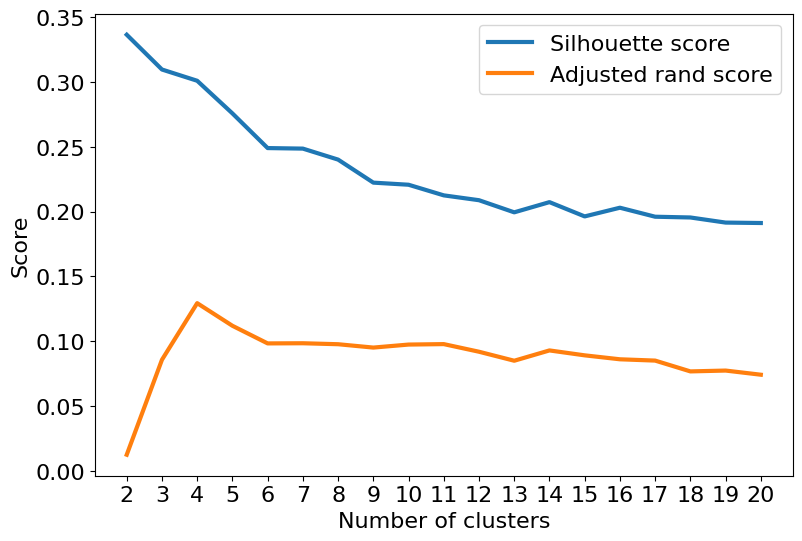

In [ ]:
#Отрисовываем график зависимости метрик от количества кластеров
plt.figure(figsize=(9, 6))
plt.plot(n_clusters, silhouette_score_values, linewidth=3, label='Silhouette score')
plt.plot(n_clusters, adjusted_rand_score_values, linewidth=3, label='Adjusted rand score')
plt.xlabel('Number of clusters', size=16)
plt.ylabel('Score', size=16)
plt.xticks(n_clusters, size=16)
plt.yticks(size=16)
plt.legend(loc='best', fontsize=16)

plt.show()


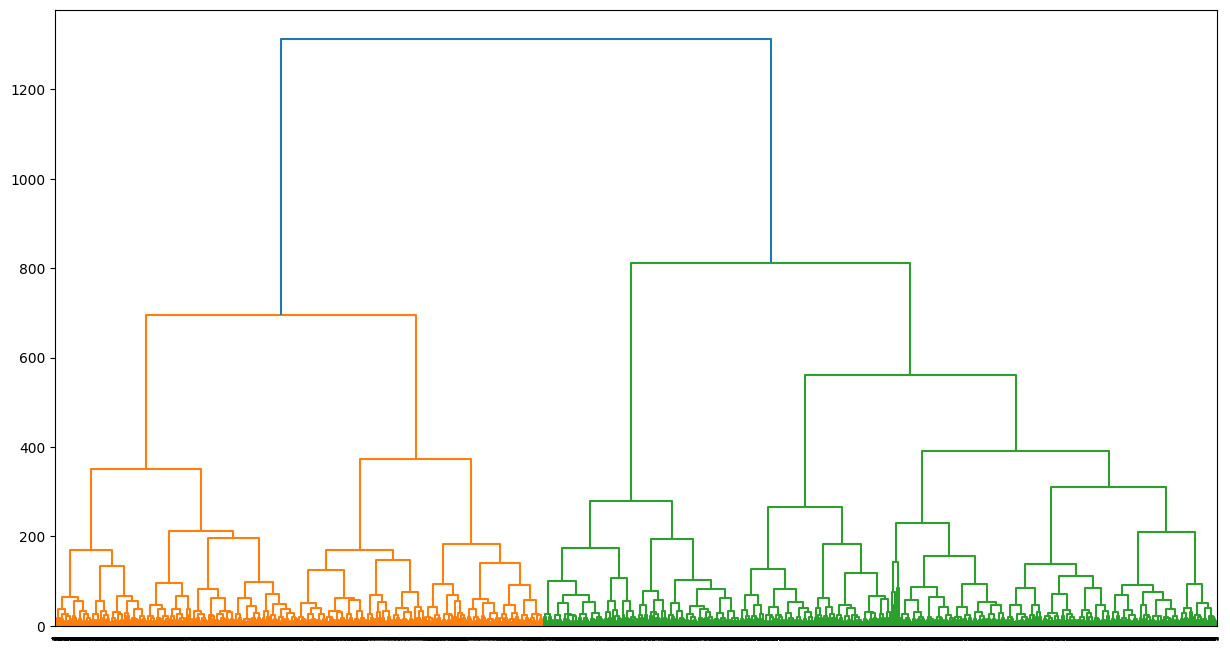

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram
samples = data.values

# Реализация иерархической кластеризации при помощи функции linkage
mergings = linkage(samples, method='ward')

plt.figure(figsize=(15, 8))
# Строим дендрограмму, указав параметры удобные для отображения
dendrogram(mergings,
           labels=list(y),
           leaf_rotation=90,
           leaf_font_size=5,
           )

plt.show()

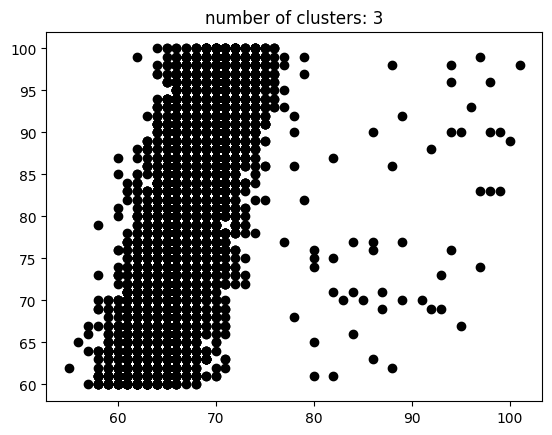

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

#Обучаем модель DBSCAN по датасету и выводим результат на экран
db = DBSCAN(eps=5.2, min_samples=30).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

unique_labels = set(labels)

colors = ['y', 'b', 'g', 'r']

for k, col in zip(unique_labels, colors):
	if k == -1:
		# Black used for noise.
		col = 'k'

	class_member_mask = (labels == k)

	xy = X[class_member_mask & core_samples_mask]
	plt.plot(xy["Exam_Score"], xy["Attendance"], 'o', markerfacecolor=col,
			markeredgecolor='k',
			markersize=6)

	xy = X[class_member_mask & ~core_samples_mask]
	plt.plot(xy["Exam_Score"], xy["Attendance"], 'o', markerfacecolor=col,
			markeredgecolor='k',
			markersize=6)

plt.title('number of clusters: %d' % n_clusters_)
plt.show()


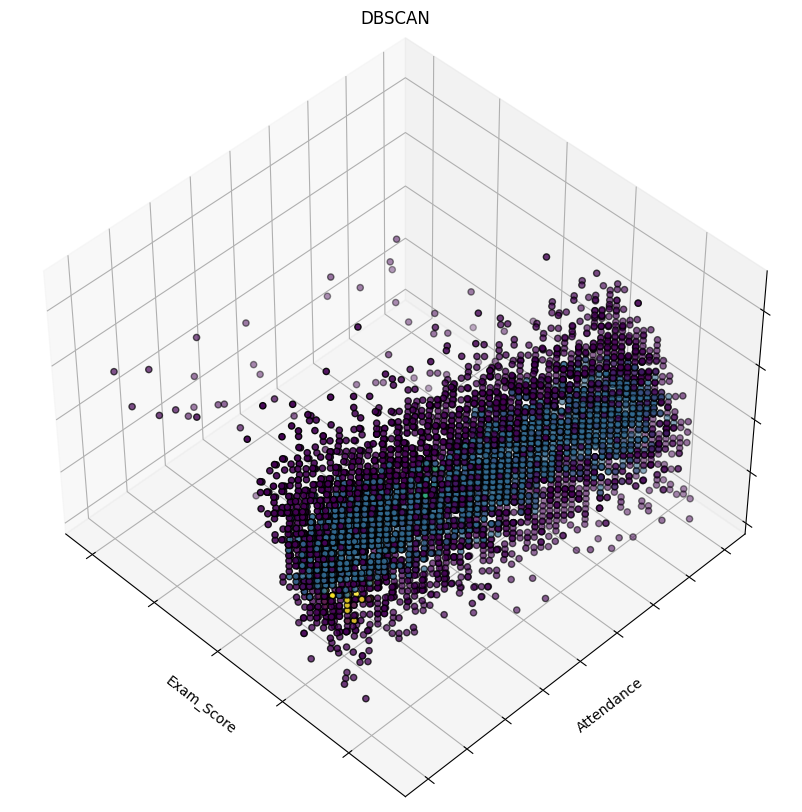

In [ ]:
#Отрисовываем модель в 3D
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, projection="3d", elev=45, azim=135)

ax.scatter(X["Exam_Score"], X["Attendance"], X["Hours_Studied"], c=labels.astype(float), edgecolor="k")

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])
ax.set_xlabel("Exam_Score")
ax.set_ylabel("Attendance")
ax.set_zlabel("Hours_Studied")
ax.set_title("DBSCAN")

plt.show()

In [ ]:
# Метрики по DBSCAN
sc = metrics.silhouette_score(X, labels)
print("Silhouette Coefficient:%0.2f" % sc)
ari = adjusted_rand_score(y, labels)
print("Adjusted Rand Index: %0.2f" % ari)

Silhouette Coefficient:-0.28
Adjusted Rand Index: 0.02


Мне не удалось найти такие значения eps и min_samples при которых получалась бы адекватная картинка кластеризации с выбросами и метрики. Скорее всего это обусловленно тем, что я искуственно создал столбец класса.